# Confusion Matrix

Binary classification

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [2]:
import pandas as pd

In [6]:
cm = {'n=165': ['Actual NO', 'Actual YES'],
     'Predicted NO': [50, 5],
     'Predicted YES': [10, 100]}

df = pd.DataFrame(cm)


In [7]:
df

,n=165,Predicted NO,Predicted YES
0,Actual NO,50,10
1,Actual YES,5,100


In [8]:
pivot = df.pivot_table(index = ['n=165'], values = ['Predicted NO', 'Predicted YES'])
pivot

,Predicted NO,Predicted YES
n=165,,
Actual NO,50,10
Actual YES,5,100


In [9]:
TP = 100
TN = 50
FP = 10
FN = 5

In [11]:
# Accuracy: Overall, how often is the classifier correct?
# (TP+TN)/total = (100+50)/165 = 0.91

Accuracy = (TP + TN) / 165
Accuracy

0.9090909090909091

In [12]:
# Precision: When it predicts yes, how often is it correct?
# TP/predicted yes = 100/110 = 0.91

Precision = (TP) / (TP + FP)
Precision

0.9090909090909091

In [13]:
#True Positive Rate: When it's actually yes, how often does it predict yes?
#TP/actual yes = 100/105 = 0.95

Recall = (TP) / (TP + FN)
Recall

0.9523809523809523

In [ ]:
#F1 score is the harmonic mean between precision and recall

In [ ]:
#True positive Rate = Recall

In [14]:
#False Positive Rate: When it's actually no, how often does it predict yes?
#FP/actual no = 10/60 = 0.17

false_positive_rate = (FP) / (FP + TN)
false_positive_rate

0.16666666666666666

In [15]:
true_negative_rate = 1 - false_positive_rate
true_negative_rate

0.8333333333333334

# Multi- class Classification

Micro-, Macro-, Weighted-averaged Precision

https://www.mariakhalusova.com/posts/2019-04-17-ml-model-evaluation-metrics-p2/

In [17]:
from sklearn.metrics import precision_score

https://www.mariakhalusova.com/images/metrics/tp-fp-fn-table.png

In [15]:
actuals = ['cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'bird', 'bird']
predictions = ['cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'bird']

https://scikit-learn.org/stable/modules/model_evaluation.html#from-binary-to-multiclass-and-multilabel

In [18]:
precision_score(actuals, predictions, average='macro')

0.8222222222222223

In [19]:
precision_score(actuals, predictions, average='micro')

0.7777777777777778

In [21]:
precision_score(actuals, predictions, average='weighted')

0.8

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actuals, predictions)

array([[1, 0, 1],
       [0, 4, 0],
       [0, 1, 2]], dtype=int64)

In [27]:
matrix= confusion_matrix(actuals, predictions)

<AxesSubplot:>

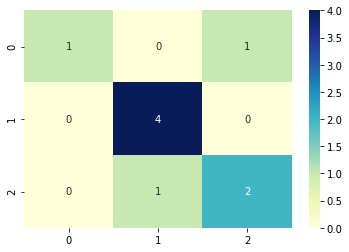

In [31]:
import seaborn as sns
sns.heatmap(matrix, annot=True, cmap="YlGnBu")

In [34]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(actuals, predictions)

array([[[7, 0],
        [1, 1]],

       [[4, 1],
        [0, 4]],

       [[5, 1],
        [1, 2]]], dtype=int64)

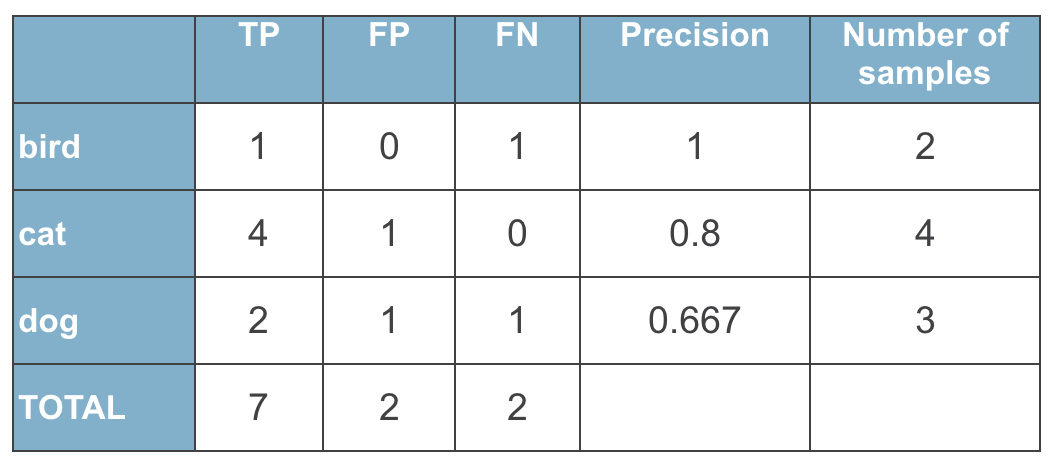

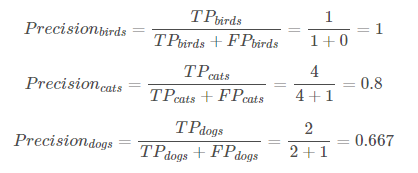

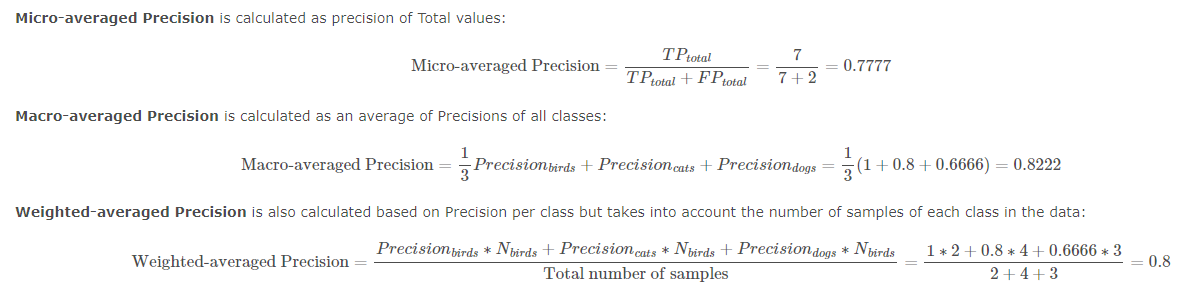

In [43]:
mcm =multilabel_confusion_matrix(actuals, predictions)
mcm = multilabel_confusion_matrix(actuals, predictions)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]

In [45]:
tp

array([1, 4, 2], dtype=int64)

Plot multi label confusion matrix
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-download-auto-examples-model-selection-plot-confusion-matrix-py

In [32]:
metrics = {'TP':[1,4,2,7],
        'FP':[0,1,1,2],
        'FN':[1,0,1,2]
       }
df = pd.DataFrame(metrics, index =['Bird',
                                'Cat',
                                'Dog',
                                'Total'
                               ])

df

,TP,FP,FN
Bird,1,0,1
Cat,4,1,0
Dog,2,1,1
Total,7,2,2
